Tempo de Execução (Ordenados Ascendentemente):
   Tamanho  Quicksort (s)  Heapsort (s)  Shellsort (s)
0      500       0.002070      0.001474       0.000196
1     5000       0.160766      0.012464       0.003607
2    10000       0.623649      0.024983       0.007937
3    30000       5.187394      0.090659       0.025637

Tempo de Execução (Ordenados Descendentemente):
   Tamanho  Quicksort (s)  Heapsort (s)  Shellsort (s)
0      500       0.000408      0.000751       0.000338
1     5000       0.005503      0.010386       0.006118
2    10000       0.012230      0.022038       0.012824
3    30000       0.040049      0.078234       0.041904

Tempo de Execução (Desordenados):
   Tamanho  Quicksort (s)  Heapsort (s)  Shellsort (s)
0      500       0.000598      0.000751       0.000474
1     5000       0.005998      0.011276       0.009471
2    10000       0.011742      0.025485       0.021743
3    30000       0.039999      0.085629       0.082256

Número de Comparações (Ordenados Ascendente

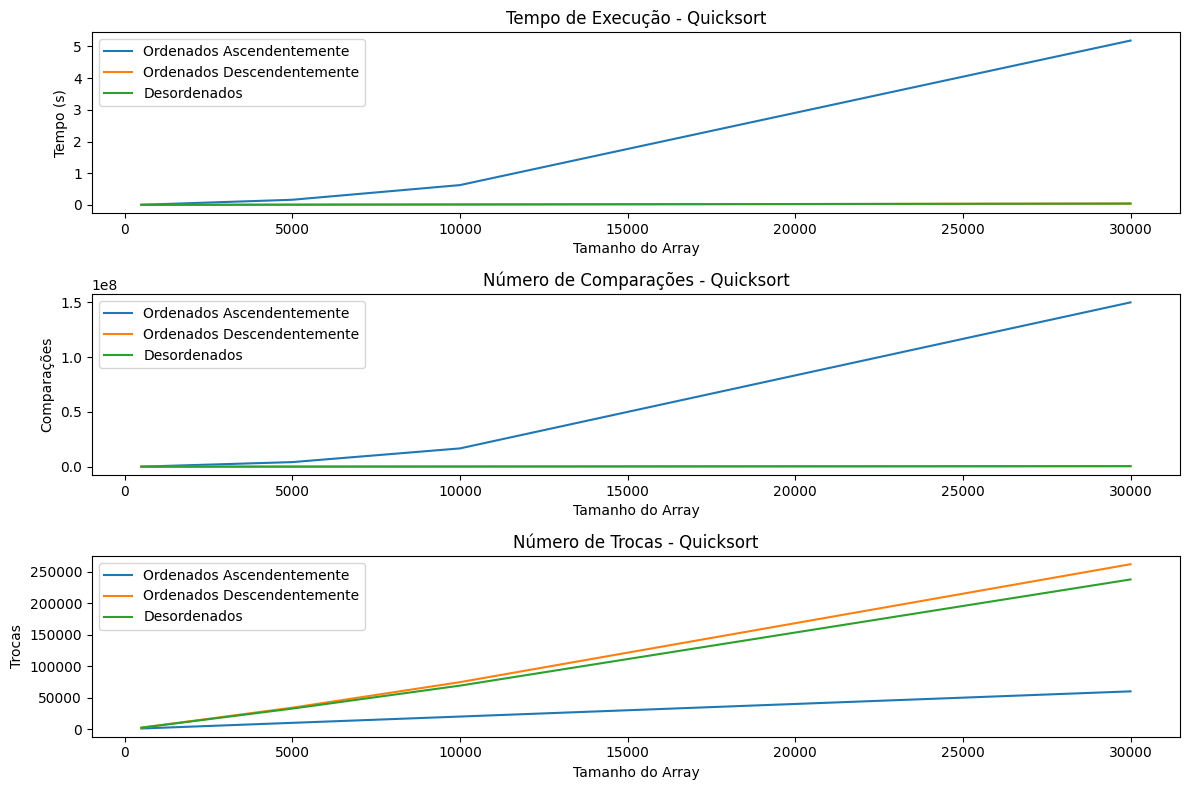

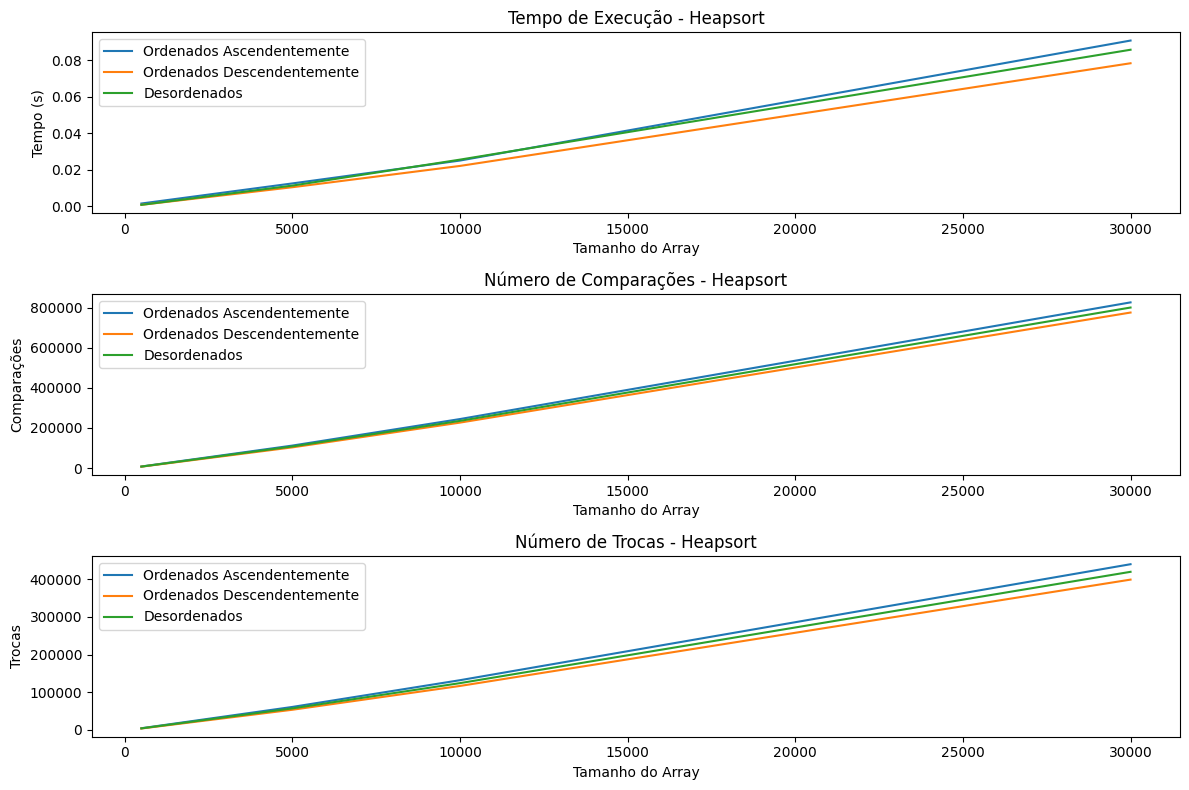

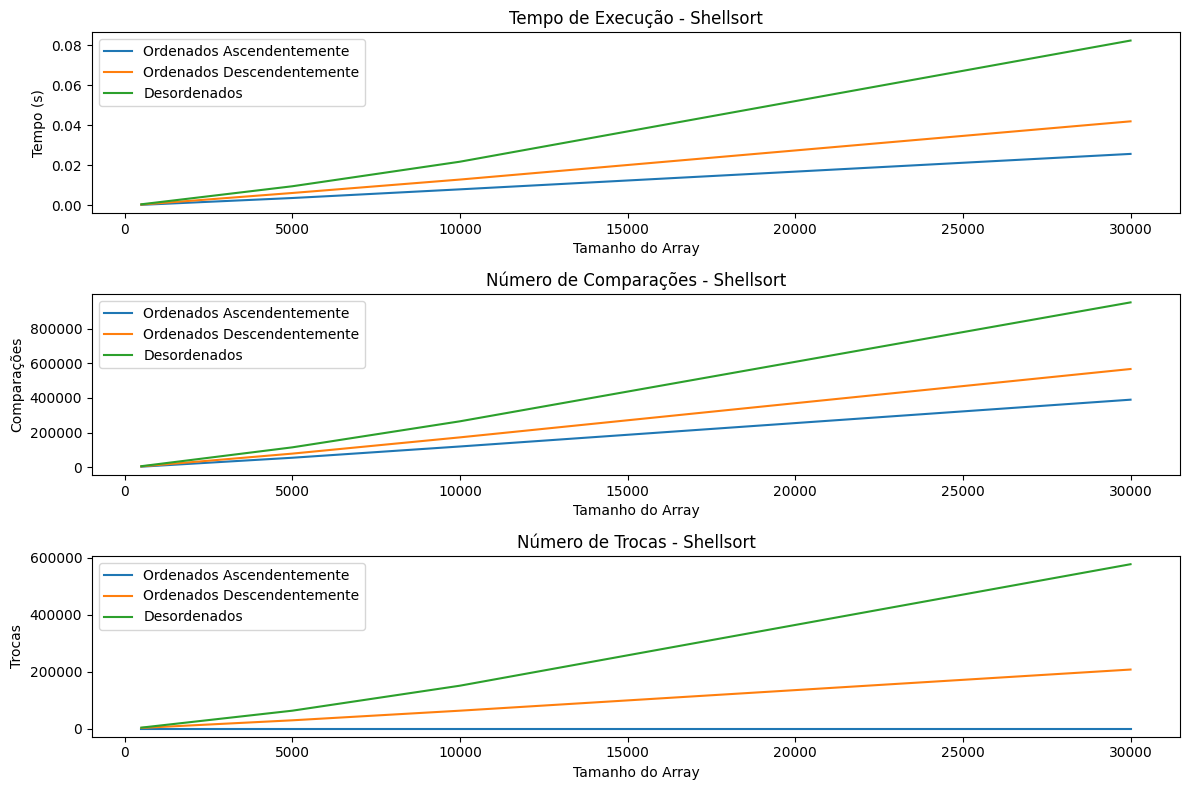

In [19]:
#Questão 8 - lista 5
# O objetivo desse exercício é fazer um estudo comparativo entre os  algoritmos de ordenação Quicksort, Heapsort e Shellsort.
# Segue implementação dos algoritmos de ordenação e a função testar_algoritmos_de_ordenacao que compara o tempo de execução, número de comparações e número de trocas entre os algoritmos.

import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.setrecursionlimit(100000)

def quicksort(arr):
    comparacoes = 0
    trocas = 0

    def particao(esquerda, direita):
        nonlocal comparacoes, trocas
        meio = (esquerda + direita) // 2
        pivo = sorted([arr[esquerda], arr[meio], arr[direita]])[1]
        i = esquerda - 1
        for j in range(esquerda, direita):
            comparacoes += 1
            if arr[j] < pivo:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
                trocas += 1
        arr[i + 1], arr[direita] = arr[direita], arr[i + 1] #troca o pivo com o elemento na posição i + 1
        trocas += 1
        return i + 1

    def quicksort_recursivo(esquerda, direita):
        if esquerda < direita:
            pi = particao(esquerda, direita)
            quicksort_recursivo(esquerda, pi - 1) #ordena a partição esquerda
            quicksort_recursivo(pi + 1, direita) #ordena a partição direita

    quicksort_recursivo(0, len(arr) - 1)
    return comparacoes, trocas

def heapsort(arr):
    comparacoes = 0
    trocas = 0

    def heapify(n, i):
        nonlocal comparacoes, trocas
        maior = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n:
            comparacoes += 1
            if arr[l] > arr[maior]:
                maior = l

        if r < n:
            comparacoes += 1
            if arr[r] > arr[maior]:
                maior = r

        if maior != i:
            arr[i], arr[maior] = arr[maior], arr[i]
            trocas += 1
            heapify(n, maior)

    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        trocas += 1
        heapify(i, 0)

    return comparacoes, trocas

def shellsort(arr):
    comparacoes = 0
    trocas = 0
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap:
                comparacoes += 1
                if arr[j - gap] > temp:
                    arr[j] = arr[j - gap]
                    trocas += 1
                    j -= gap
                else:
                    break
            arr[j] = temp
        gap //= 2
    return comparacoes, trocas

def gerar_ordenados_asc(size):
    return list(range(size))

def gerar_ordenados_desc(size):
    return list(range(size, 0, -1))

def gerar_desordenados(size):
    arr = list(range(size))
    random.shuffle(arr)
    return arr

def testar_algoritmos_de_ordenacao():
    sizes = [500, 5000, 10000, 30000]
    algoritmos = {
        "Quicksort": quicksort,
        "Heapsort": heapsort,
        "Shellsort": shellsort
    }
    
    quantidade_de_execucoes = 10  # Número de execuções para calcular a média

    tempo_ordenados_asc = {name: [] for name in algoritmos}
    comparacoes_ordenados_asc = {name: [] for name in algoritmos}
    trocas_ordenados_asc = {name: [] for name in algoritmos}
    tempo_ordenados_desc = {name: [] for name in algoritmos}
    comparacoes_ordenados_desc = {name: [] for name in algoritmos}
    trocas_ordenados_desc = {name: [] for name in algoritmos}
    tempo_desordenados = {name: [] for name in algoritmos}
    comparacoes_desordenados = {name: [] for name in algoritmos}
    trocas_desordenados = {name: [] for name in algoritmos}

    for size in sizes:
        for name, algoritmo in algoritmos.items():
            # Ordenados Ascendentemente
            tempo_total = 0
            total_comparacoes = 0
            total_trocas = 0
            for _ in range(quantidade_de_execucoes):
                arr = gerar_ordenados_asc(size)
                inicio_tempo = time.time()
                comparacoes, trocas = algoritmo(arr.copy())
                fim_tempo = time.time()

                tempo_total += fim_tempo - inicio_tempo
                total_comparacoes += comparacoes
                total_trocas += trocas

            medias_de_tempo = tempo_total / quantidade_de_execucoes
            medias_comparacoes = total_comparacoes / quantidade_de_execucoes
            medias_trocas = total_trocas / quantidade_de_execucoes

            tempo_ordenados_asc[name].append(medias_de_tempo)
            comparacoes_ordenados_asc[name].append(medias_comparacoes)
            trocas_ordenados_asc[name].append(medias_trocas)

            # Ordenados Descendentemente
            tempo_total = 0
            total_comparacoes = 0
            total_trocas = 0
            for _ in range(quantidade_de_execucoes):
                arr = gerar_ordenados_desc(size)
                inicio_tempo = time.time()
                comparacoes, trocas = algoritmo(arr.copy())
                fim_tempo = time.time()

                tempo_total += fim_tempo - inicio_tempo
                total_comparacoes += comparacoes
                total_trocas += trocas

            medias_de_tempo = tempo_total / quantidade_de_execucoes
            medias_comparacoes = total_comparacoes / quantidade_de_execucoes
            medias_trocas = total_trocas / quantidade_de_execucoes

            tempo_ordenados_desc[name].append(medias_de_tempo)
            comparacoes_ordenados_desc[name].append(medias_comparacoes)
            trocas_ordenados_desc[name].append(medias_trocas)

            # Desordenados
            tempo_total = 0
            total_comparacoes = 0
            total_trocas = 0
            for _ in range(quantidade_de_execucoes):
                arr = gerar_desordenados(size)
                inicio_tempo = time.time()
                comparacoes, trocas = algoritmo(arr.copy())
                fim_tempo = time.time()

                tempo_total += fim_tempo - inicio_tempo
                total_comparacoes += comparacoes
                total_trocas += trocas

            medias_de_tempo = tempo_total / quantidade_de_execucoes
            medias_comparacoes = total_comparacoes / quantidade_de_execucoes
            medias_trocas = total_trocas / quantidade_de_execucoes

            tempo_desordenados[name].append(medias_de_tempo)
            comparacoes_desordenados[name].append(medias_comparacoes)
            trocas_desordenados[name].append(medias_trocas)

    # Criação das Tabelas Comparativas
    df_tempo_ordenados_asc = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name} (s)": tempo_ordenados_asc[name] for name in algoritmos}
    })
    
    df_tempo_ordenados_desc = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name} (s)": tempo_ordenados_desc[name] for name in algoritmos}
    })
    
    df_tempo_desordenados = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name} (s)": tempo_desordenados[name] for name in algoritmos}
    })
    
    df_comparacoes_ordenados_asc = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": comparacoes_ordenados_asc[name] for name in algoritmos}
    })
    
    df_comparacoes_ordenados_desc = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": comparacoes_ordenados_desc[name] for name in algoritmos}
    })
    
    df_comparacoes_desordenados = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": comparacoes_desordenados[name] for name in algoritmos}
    })
    
    df_trocas_ordenados_asc = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": trocas_ordenados_asc[name] for name in algoritmos}
    })
    
    df_trocas_ordenados_desc = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": trocas_ordenados_desc[name] for name in algoritmos}
    })
    
    df_trocas_desordenados = pd.DataFrame({
        "Tamanho": sizes,
        **{f"{name}": trocas_desordenados[name] for name in algoritmos}
    })
    
    print("Tempo de Execução (Ordenados Ascendentemente):")
    print(df_tempo_ordenados_asc)
    print("\nTempo de Execução (Ordenados Descendentemente):")
    print(df_tempo_ordenados_desc)
    print("\nTempo de Execução (Desordenados):")
    print(df_tempo_desordenados)
    print("\nNúmero de Comparações (Ordenados Ascendentemente):")
    print(df_comparacoes_ordenados_asc)
    print("\nNúmero de Comparações (Ordenados Descendentemente):")
    print(df_comparacoes_ordenados_desc)
    print("\nNúmero de Comparações (Desordenados):")
    print(df_comparacoes_desordenados)
    print("\nNúmero de Trocas (Ordenados Ascendentemente):")
    print(df_trocas_ordenados_asc)
    print("\nNúmero de Trocas (Ordenados Descendentemente):")
    print(df_trocas_ordenados_desc)
    print("\nNúmero de Trocas (Desordenados):")
    print(df_trocas_desordenados)

    # Plotagem dos Gráficos
    for name in algoritmos:
        plt.figure(figsize=(12, 8))

        plt.subplot(3, 1, 1)
        plt.plot(sizes, tempo_ordenados_asc[name], label='Ordenados Ascendentemente')
        plt.plot(sizes, tempo_ordenados_desc[name], label='Ordenados Descendentemente')
        plt.plot(sizes, tempo_desordenados[name], label='Desordenados')
        plt.title(f'Tempo de Execução - {name}')
        plt.xlabel('Tamanho do Array')
        plt.ylabel('Tempo (s)')
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(sizes, comparacoes_ordenados_asc[name], label='Ordenados Ascendentemente')
        plt.plot(sizes, comparacoes_ordenados_desc[name], label='Ordenados Descendentemente')
        plt.plot(sizes, comparacoes_desordenados[name], label='Desordenados')
        plt.title(f'Número de Comparações - {name}')
        plt.xlabel('Tamanho do Array')
        plt.ylabel('Comparações')
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(sizes, trocas_ordenados_asc[name], label='Ordenados Ascendentemente')
        plt.plot(sizes, trocas_ordenados_desc[name], label='Ordenados Descendentemente')
        plt.plot(sizes, trocas_desordenados[name], label='Desordenados')
        plt.title(f'Número de Trocas - {name}')
        plt.xlabel('Tamanho do Array')
        plt.ylabel('Trocas')
        plt.legend()

        plt.tight_layout()
        plt.show()

testar_algoritmos_de_ordenacao()